### 변수
- 명목변수 (Categorical or nominal Variable)
: 순서가 없고 문자로 표현되는 변수

- 순위변수 (Ordinal Variable)
:순서가 있는 변수

- 간격변수 (Interval Variable)
: 범주화 가능 변수

- 연속변수 (Continuous Variable)
: ex) height, weight

RANDOM NUMBER
- import random

In [2]:
import random
#random.seed() the number is always the same
random.seed(3)
print("1st random number on the basis of the seed {}".format(random.random()))
print("2nd random number on the basis of the seed {}".format(random.random()))

1st random number on the basis of the seed 0.23796462709189137
2nd random number on the basis of the seed 0.5442292252959519


**numpy random
- numpy.random.rand 모든 랜덤값이 똑같은 확률로 불려지는 균등분포
- numpy.random.randn 정규분푸의 확률로 불려짐


In [4]:
#changes every time
import numpy as np
print(np.random.random((3,2)))

[[0.6067043  0.4534416 ]
 [0.91491243 0.31846816]
 [0.49966111 0.81213725]]


In [5]:
import random
print (random.sample([1,2,3,4,6], 2))
print (random.sample([1,2,3,4,6], 3))

[3, 4]
[6, 1, 3]


In [10]:
# randmo sampling
dice=[]
for i in range(100):
   dice.append(random.randrange(1,6+1))
print(dice)

[1, 5, 6, 6, 2, 3, 5, 2, 6, 3, 2, 3, 2, 6, 4, 6, 6, 1, 1, 5, 3, 3, 6, 2, 4, 2, 1, 3, 6, 6, 2, 5, 4, 3, 2, 1, 1, 5, 2, 3, 5, 2, 3, 3, 6, 1, 5, 3, 5, 2, 4, 3, 5, 3, 4, 3, 6, 4, 3, 4, 5, 4, 1, 4, 2, 2, 1, 4, 5, 5, 4, 5, 6, 2, 1, 6, 4, 6, 6, 5, 3, 5, 3, 2, 1, 5, 3, 1, 2, 1, 1, 6, 5, 2, 4, 5, 1, 1, 4, 6]


In [11]:
for i in range(1,7):
    print("Dice {} : {}회".format(i,dice.count(i)))

Dice 1 : 16회
Dice 2 : 17회
Dice 3 : 18회
Dice 4 : 14회
Dice 5 : 18회
Dice 6 : 17회


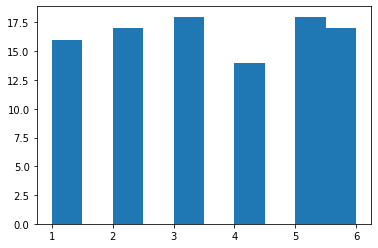

In [12]:
#histogram
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(dice)
plt.show()

pandas 함수
- describe()

In [13]:
import pandas as pd
s=pd.Series(dice)

In [15]:
print(s.describe())

count    100.00000
mean       3.52000
std        1.72023
min        1.00000
25%        2.00000
50%        3.00000
75%        5.00000
max        6.00000
dtype: float64


### 정규분포 Normal Distribution
무작위 변수 x가 있다고 하자. x는 정규분포를 따른다고 하며, 평균 $\mu$, 표준편차 $\sigma$를 가지게 된다.

In [16]:
#평균 0, 표준편차 1을 가지는 정규분포에서 샘플 200개
comp1=np.random.normal(0, 1, size=200)

In [17]:
count, binends = np.histogram(comp1)

In [18]:
print(count)
print(binends)

[ 9 10 28 30 40 31 23 19  7  3]
[-2.15383393 -1.67794153 -1.20204912 -0.72615672 -0.25026431  0.22562809
  0.7015205   1.1774129   1.6533053   2.12919771  2.60509011]


(array([ 9., 10., 28., 30., 40., 31., 23., 19.,  7.,  3.]),
 array([-2.15383393, -1.67794153, -1.20204912, -0.72615672, -0.25026431,
         0.22562809,  0.7015205 ,  1.1774129 ,  1.6533053 ,  2.12919771,
         2.60509011]),
 <a list of 10 Patch objects>)

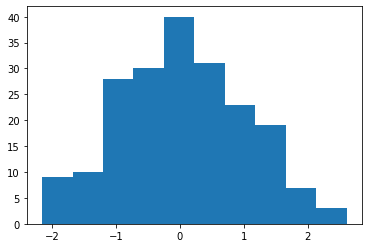

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(comp1)

In [20]:
comp2 = np.random.normal(10, 2, size=100)

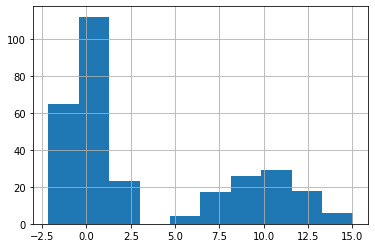

In [21]:
values = pd.Series(np.concatenate([comp1, comp2]))
values.hist()

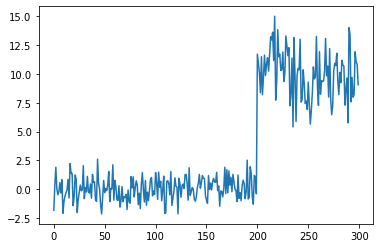

In [22]:
values.plot()
plt.show()
#표준편차가 큰 우측 그래프의 변동폭이 더 크다.

### 중심극한정리
평균이 $\mu$, 표준편차가 $\sigma$인 모집단이 있을때, 이 모집단에서 무작위로 뽑은 표본들의 평균과 분산이 정규분포에 따른다.
 $\sigma =  \frac{\sigma}{\sqrt{n}}$ 따라서 $\frac{\sigma} {\sqrt{n}}$로 계산한다

**Skewness 분포의 대칭성**
- (s=0) : 정규분포
- (s>0) : 왼쪽으로 비스듬, 왼쪽이 더 뚱뚱
- (s<0) : 오른쪽으로 비스듬, 오른쪽이 더 뚱뚱

In [24]:
from scipy.stats import skew

print ("skewness\t: {}".format(skew(comp1)))

skewness	: 0.07562031850961332


**kurtosis 분포의 뾰족한 정도**
- (k=0) : 정규분포
- (k>0) : 뾰족하고, 꼬리가 두툼
- (k<0) : 편평하고, 꼬리가 얇음

In [27]:
from scipy.stats import kurtosis

print ("kurtosis_comp1: {}".format(kurtosis(comp1)))
print ("kurtosis_comp2: {}".format(kurtosis(comp2)))

kurtosis_comp1: -0.3709665476436035
kurtosis_comp2: -0.512494995951128


**skweness, kurtosis with Spark**

In [28]:
import pyspark

myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

In [29]:
x=np.random.randn(100)

In [30]:
import pandas as pd 
xPd=pd.DataFrame(x, columns=['x'], dtype=float)

In [32]:
df=spark.createDataFrame(xPd)

In [33]:
from pyspark.sql import functions as f
df.select(f.skewness(df['x']), f.kurtosis(df['x'])).show()

+-------------------+-------------------+
|        skewness(x)|        kurtosis(x)|
+-------------------+-------------------+
|0.29669211366027604|-0.2313621676721831|
+-------------------+-------------------+



In [35]:
#mean
print ("simple mean of x = {:.3f}".format(float(sum(x))/len(x)))

simple mean of x = -0.004


In [38]:
import numpy as np
xbar = np.mean(x)
print ("simple mean of x = {:.3f}".format(xbar))

simple mean of x = -0.004


In [45]:
print(np.sqrt(sum([(a-xbar)**2 for a in x])/len(x)))
print(np.sqrt(sum([(a-xbar)**2 for a in x])/(len(x)-1)))

1.0443864745572184
1.0496479006752575


In [46]:
sx=np.sqrt(np.var(x, ddof=1)) #=np.std
print(sx)

1.0496479006752577


In [48]:
print(np.std(x))
print(np.std(x, ddof=1))

1.0443864745572184
1.0496479006752577


### zscore
: 평균에서 표준편차의 몇 배가 떨어져 있는지,**표준편차의 배수로 떨어진 정도를 정규화(표준화)**
$$
z = \frac {\bar{x_n} - \mu} {\sigma / \sqrt{n}} 
$$

In [49]:
X=[10, 7, 12, 12, 9, 16, 12, 18, 8, 12, 14, 16]

In [50]:
import numpy as np
xbar = np.mean(X)
sigmax=np.std(X)
sx=np.std(X,ddof=1)
for x in X:
    zscore=(x-xbar)/sx
    print(zscore, end=' ')

-0.6410300618768864 -1.5286101475525755 -0.04931000475976033 -0.04931000475976033 -0.9368900904354495 1.1341301094744918 -0.04931000475976033 1.725850166591618 -1.2327501189940124 -0.04931000475976033 0.5424100523573657 1.1341301094744918 

#### stats zscore

In [51]:
from scipy import stats
stats.zscore(X)

array([-0.66953406, -1.59658123, -0.05150262, -0.05150262, -0.97854978,
        1.18456027, -0.05150262,  1.80259171, -1.28756551, -0.05150262,
        0.56652882,  1.18456027])

### Cdf ( Cumulative Distribution Function)
:누적확률, 정규분포에서 평균은 0, 표준편차는 1

In [53]:
from scipy.stats import norm
#loc = 평균, scale = 표준편차
norm.cdf(0, loc=0, scale=1)

0.5

#### ppf (Percent Point Function)
ppf는 cdf의 역

In [55]:
norm.ppf([0.001])

-3.090232306167813

In [58]:
norm.cdf([-3.090232306167813])

array([0.001])

### Tscore
표본의 크기가 크면 모집단과 차이가 없는데, 표본이 작으면 t분포 사용.\
t분포 정규분포와 유사한 모양, 꼬리가 두툼. 

In [59]:
from scipy.stats import t
t.cdf(1,1) #dof 1

0.7500000000000002

In [60]:
t.cdf(1, 1, loc=0, scale=1)

0.7500000000000002